In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
print('Tensorflow version: %s' % tf.__version__)

Tensorflow version: 2.0.0


In [4]:
tf.test.is_gpu_available()

False

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

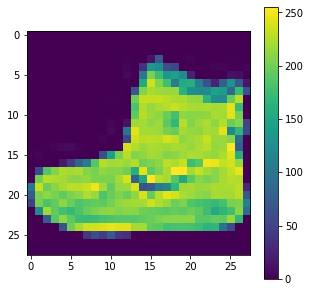

In [6]:
train_image = train_image
plt.figure(figsize=(5,5))
plt.imshow(train_image[0])
plt.colorbar()

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
train_image = np.expand_dims(train_image,-1)

In [9]:
train_image.shape

(60000, 28, 28, 1)

In [10]:
test_image = np.expand_dims(test_image,-1)

In [11]:
test_image.shape

(10000, 28, 28, 1)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), 
                                 input_shape=train_image.shape[1:],
                                 activation='relu',
                                 padding='same'))

In [13]:
model.output_shape

(None, 28, 28, 32)

In [14]:
model.add(tf.keras.layers.MaxPooling2D())

In [15]:
model.output_shape

(None, 14, 14, 32)

In [16]:
model.add(tf.keras.layers.Conv2D(64, (3,3),
                                 activation='relu'))

In [17]:
model.output_shape

(None, 12, 12, 64)

In [18]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [19]:
model.output_shape

(None, 64)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=train_image.shape[1:], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
history = model.fit(train_image, train_label, epochs=30, validation_data=(test_image, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 390us/sample - loss: 0.8207 - acc: 0.7333 - val_loss: 0.5233 - val_acc: 0.8245
Epoch 2/30
60000/60000 [==============================] - 22s 360us/sample - loss: 0.4910 - acc: 0.8273 - val_loss: 0.5031 - val_acc: 0.8221
Epoch 3/30
60000/60000 [==============================] - 21s 357us/sample - loss: 0.4326 - acc: 0.8485 - val_loss: 0.4354 - val_acc: 0.8480
Epoch 4/30
60000/60000 [==============================] - 21s 356us/sample - loss: 0.3989 - acc: 0.8598 - val_loss: 0.4024 - val_acc: 0.8590
Epoch 5/30
60000/60000 [==============================] - 22s 359us/sample - loss: 0.3701 - acc: 0.8706 - val_loss: 0.3785 - val_acc: 0.8676
Epoch 6/30
60000/60000 [==============================] - 22s 359us/sample - loss: 0.3525 - acc: 0.8760 - val_loss: 0.3569 - val_acc: 0.8752
Epoch 7/30
60000/60000 [==============================] - 21s 344us/sample - loss: 0.3344 - acc: 0.8828 

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

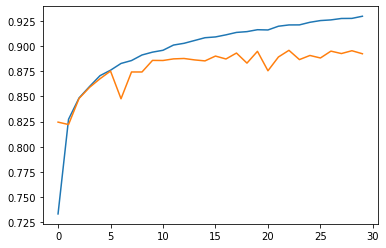

In [25]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

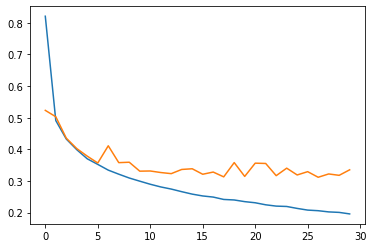

In [26]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')